In [1]:
import sys
import os

# Obtener el directorio actual
current_directory = os.getcwd()

# Subir dos niveles al directorio raíz, donde se encuentra la carpeta 'interpretml'
root_path = os.path.abspath(os.path.join(current_directory, '..', '..', '..'))

sys.path.append(root_path)

In [2]:
import pandas as pd
import numpy as np
import interpret
from interpret import show

In [3]:
from interpret.glassbox.nam.wrapper import NAMClassifier

In [4]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv').to_numpy().ravel()

X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv').to_numpy().ravel()

In [5]:
X_train.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
dtype: object

In [6]:
print(isinstance(X_train, pd.DataFrame))

True


In [7]:
model = NAMClassifier(
            num_epochs=50,
            num_learners=5,
            metric='accuracy',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=1,
            random_state=42
        )

model.fit(X_train, y_train)

object
<class 'numpy.ndarray'>
[[7.0 150.0 78.0 29.0 126.0 35.2 0.6920000000000001 54.0]
 [4.0 97.0 60.0 23.0 0.0 28.2 0.4429999999999999 22.0]
 [0.0 165.0 90.0 33.0 680.0 52.3 0.427 23.0]
 [1.0 109.0 56.0 21.0 135.0 25.2 0.833 23.0]
 [8.0 120.0 0.0 0.0 0.0 30.0 0.183 38.0]]


AttributeError: module 'tensorflow' has no attribute 'io'

In [ ]:
model.predict(X_test).squeeze()

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [ ]:
X_test.iloc[[0]]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,1,199,76,43,0,42.9,1.394,22


In [ ]:
model.predict_proba(X_test.iloc[[0]])

array([[0.38314985]])

In [ ]:
model.predict(X_test.iloc[[0]])

array([[0.]])

In [ ]:
(model.predict(X_test).squeeze() == y_test).sum() / len(y_test)

0.7207792207792207

In [ ]:
model.models[0]

NAM(
  (dropout_layer): Dropout(p=0.05, inplace=False)
  (feature_nns): ModuleList(
    (0): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, out_features=34)
        (1): Linear(in_features=34, out_features=64, bias=True)
        (2): ReLU()
        (3): Linear(in_features=64, out_features=32, bias=True)
        (4): ReLU()
        (5): Linear(in_features=32, out_features=1, bias=False)
      )
    )
    (1): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, out_features=64)
        (1): Linear(in_features=64, out_features=64, bias=True)
        (2): ReLU()
        (3): Linear(in_features=64, out_features=32, bias=True)
        (4): ReLU()
        (5): Linear(in_features=32, out_features=1, bias=False)
      )
    )
    (2): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, 

In [ ]:
model.plot(1)

{'x': array([-19.8       , -19.72077359, -19.64154718, ..., 217.64154718,
        217.72077359, 217.8       ]),
 'y': array([11.685787  , 11.639984  , 11.594179  , ...,  0.18601935,
         0.1860965 ,  0.18617368], dtype=float32),
 'conf_int': array([9.362091  , 9.325381  , 9.288671  , ..., 0.13736996, 0.13741882,
        0.13746771], dtype=float32)}

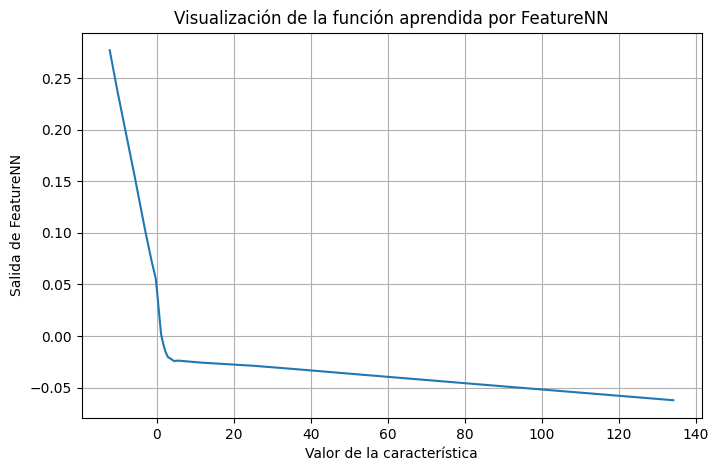

In [ ]:
import matplotlib.pyplot as plt

plot = model.plot(2)

x = plot['x']
y = plot['y']
conf_int = plot['conf_int']    

plt.figure(figsize=(8, 5))
plt.plot(x, y)

plt.xlabel("Valor de la característica")
plt.ylabel("Salida de FeatureNN")
plt.title("Visualización de la función aprendida por FeatureNN")
plt.grid(True)

# Mostrar la gráfica
plt.show()

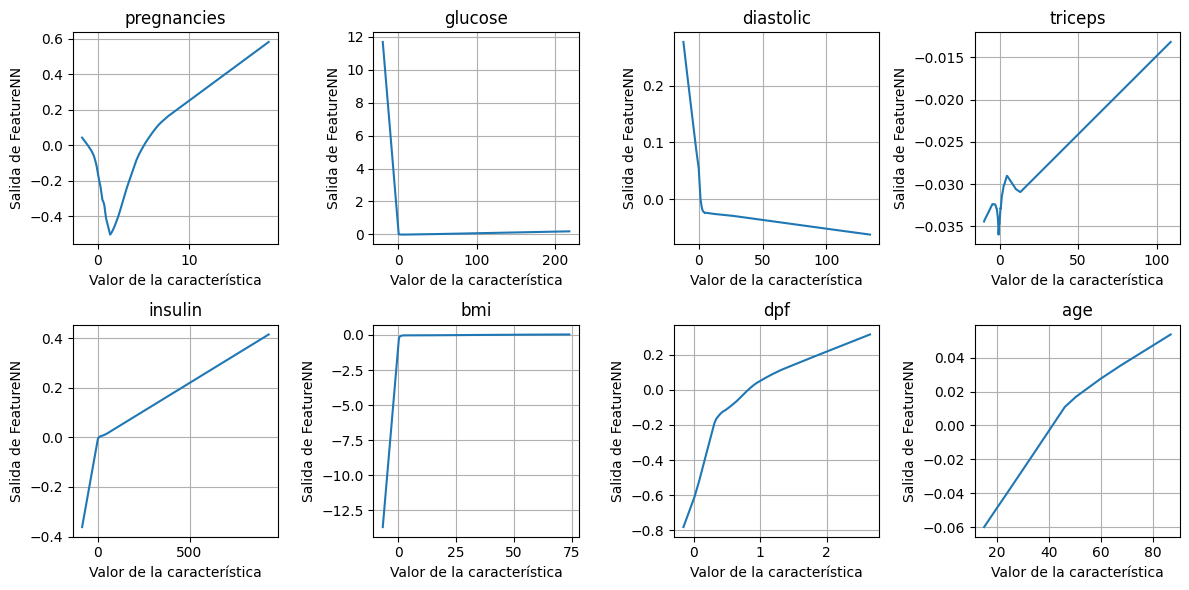

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i in range(8):
    plot = model.plot(i)
    x = plot['x']
    y = plot['y']
    conf_int = plot['conf_int']    

    ax = axes[i]
    ax.plot(x, y)

    ax.set_xlabel("Valor de la característica")
    ax.set_ylabel("Salida de FeatureNN")
    ax.set_title(X_train.columns[i])
    ax.grid(True)
    
plt.tight_layout()
plt.show()


In [ ]:
X_train.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
dtype: object

In [ ]:
nam_global = model.explain_global()
show(nam_global)

<!-- http://127.0.0.1:7001/1823442795336/ -->

In [ ]:
nam_global._internal_obj['overall']

{'names': ['pregnancies',
  'glucose',
  'diastolic',
  'triceps',
  'insulin',
  'bmi',
  'dpf',
  'age'],
 'scores': [0.29671004,
  1.890581,
  0.060638342,
  0.006018947,
  0.16132075,
  2.2707899,
  0.27190268,
  0.033130713],
 'extra': {'names': ['Intercept'], 'scores': [0.5]}}

In [ ]:
len(nam_global._internal_obj['specific'])

8

In [ ]:
nam_global._internal_obj['specific'][0]

{'names': array([-1.7       , -1.69319773, -1.68639547, ..., 18.68639547,
        18.69319773, 18.7       ]),
 'scores': array([0.04289872, 0.04243914, 0.04197957, ..., 0.5826701 , 0.58292866,
        0.5831873 ], dtype=float32),
 'density': {'scores': array([202,  78,  58,  49,  91,  34,  30,  22,  21,  16,   9,   2,   1,
           1], dtype=int64),
  'names': array([0.0, 1.2142857142857142, 2.4285714285714284, 3.6428571428571423,
         4.857142857142857, 6.071428571428571, 7.285714285714285, 8.5,
         9.714285714285714, 10.928571428571427, 12.142857142857142,
         13.357142857142856, 14.57142857142857, 15.785714285714285, 17.0],
        dtype=object)}}

In [ ]:
model.models[0]._bias

Parameter containing:
tensor([-0.2912], requires_grad=True)

In [ ]:
len(model.models)

5

In [ ]:
X_test.shape

(154, 8)

In [ ]:
X_test.iloc[[0]]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,1,199,76,43,0,42.9,1.394,22


In [ ]:
import torch

In [ ]:
feature_outputs = []

for m in model.models:
    _, fnns_out = m.forward(torch.tensor(X_test.values, dtype=torch.float32))
    fnns_out = fnns_out.unsqueeze(dim=1)
    feature_outputs.append(fnns_out[:, :, :, :].detach().cpu().numpy())

feature_outputs = np.stack(feature_outputs, axis=0)
print(feature_outputs.shape)
y = np.mean(feature_outputs, axis=0).squeeze()
print(y.shape)

(5, 154, 1, 1, 8)
(154, 8)


In [ ]:
y.shape

(154, 8)

In [ ]:
y[100]

array([-0.15004064,  0.08508094, -0.04558597, -0.02708289,  0.12128942,
        0.01259443, -0.39455682, -0.03288044], dtype=float32)

In [ ]:
X_test.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
dtype: object

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [ ]:
nam_local = model.explain_local(X_test, y_test)
show(nam_local)

<!-- http://127.0.0.1:7001/1823534258632/ -->

In [ ]:
X_test.iloc[[0]]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,1,199,76,43,0,42.9,1.394,22


In [ ]:
model.predict_proba(X_test.iloc[[0]])

array([[0.38314985]])

In [ ]:
model.predict(X_test.iloc[[0]])

array([[0.]])

In [ ]:
y_test[0]

1

In [ ]:
len(nam_local._internal_obj['specific'])

154

In [ ]:
nam_local._internal_obj['specific'][3]

{'data_type': 'univariate',
 'perf': {'is_classification': True,
  'actual': 1,
  'predicted': 0,
  'actual_score': 0.4568709637442933,
  'predicted_score': 0.5431290362557066},
 'names': ['pregnancies',
  'glucose',
  'diastolic',
  'triceps',
  'insulin',
  'bmi',
  'dpf',
  'age'],
 'scores': array([-0.00581391,  0.13572471, -0.04313662, -0.0298695 ,  0.07136984,
        -0.01202497, -0.08358045,  0.01751903], dtype=float32),
 'values': array([5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.5870000000000001, 51.0],
       dtype=object),
 'extra': {'names': ['Intercept'],
  'scores': [-0.22313404679298401],
  'values': [1]},
 'meta': {'label_names': [0, 1]}}